<a href="https://colab.research.google.com/github/nausheen53/SMAI/blob/master/q1_smai_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [0]:
from os import walk

image_names = []
for (dirpath, dirnames, filenames) in walk("/content/drive/My Drive/SMAI3/dataset"):
    image_names.extend(filenames)

In [130]:
labels=[]
for name in image_names:
    s=name.split('_')
    labels.append(s[0])
print(len(labels))

520


In [131]:
images=[]
for name in image_names:
    #images.append(cv2.imread('/home/nausheen/SMAI3/q1/dataset/'+name))
    img = cv2.imread('/content/drive/My Drive/SMAI3/dataset/'+name)
    print('Original Dimensions : ',img.shape)
    scale_percent = 60 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    #cv2.imshow("Resized image", resized)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    print('grey dimensions : ',gray.shape)
    images.append(gray)
#     cv2.imshow("Resized image", gray)
#     cv2.waitKey(5000)
#     cv2.destroyAllWindows()

Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)
grey dimensions :  (153, 153)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (153, 153, 3)


In [132]:
images=np.array(images, dtype=np.float64)
print(images.shape)
n_samples,h,w = images.shape

(520, 153, 153)


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

In [0]:
def pca(X, n_pc):
    n_samples, n_features = X.shape
    print(n_samples)
    print("n features ")
    print(n_features)
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    # U, S, V = np.linalg.svd(X)
    print("UUUUUUUUUUUUUUUU ")
    print(U)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data

hfyydydydyd
[[136. 136. 137. ...  80.  69.  63.]
 [ 40.  42.  49. ...  58.  63.  67.]
 [132. 145. 154. ... 240. 241. 248.]
 ...
 [162. 170. 176. ...  65.  62.  61.]
 [ 14.  14.  14. ...  28.  21.  40.]
 [ 89.  91.  96. ... 104. 100.  97.]]
(520, 23409)
520
n features 
23409
UUUUUUUUUUUUUUUU 
[[-4.19032663e-02 -2.17952987e-02  3.11560999e-02 ... -1.55654503e-03
   4.38528991e-02  1.29392589e-05]
 [ 5.55346621e-03 -6.43851652e-02 -3.12084664e-02 ... -3.47227915e-04
   4.38528991e-02  1.29392589e-05]
 [ 1.47123091e-02 -6.65722824e-02  3.72255035e-02 ... -1.60120608e-03
   4.38528991e-02  1.29392589e-05]
 ...
 [-1.13016846e-02 -1.07253531e-01  9.87495595e-03 ... -3.68153889e-04
   4.38528991e-02  1.29392589e-05]
 [ 5.44431870e-02  5.46941221e-02  7.70120953e-02 ...  1.50822344e-05
   4.38528991e-02  1.29392589e-05]
 [ 7.44059038e-03 -2.27583543e-02 -4.09366768e-02 ... -6.95434935e-04
   4.38528991e-02  1.29392589e-05]]


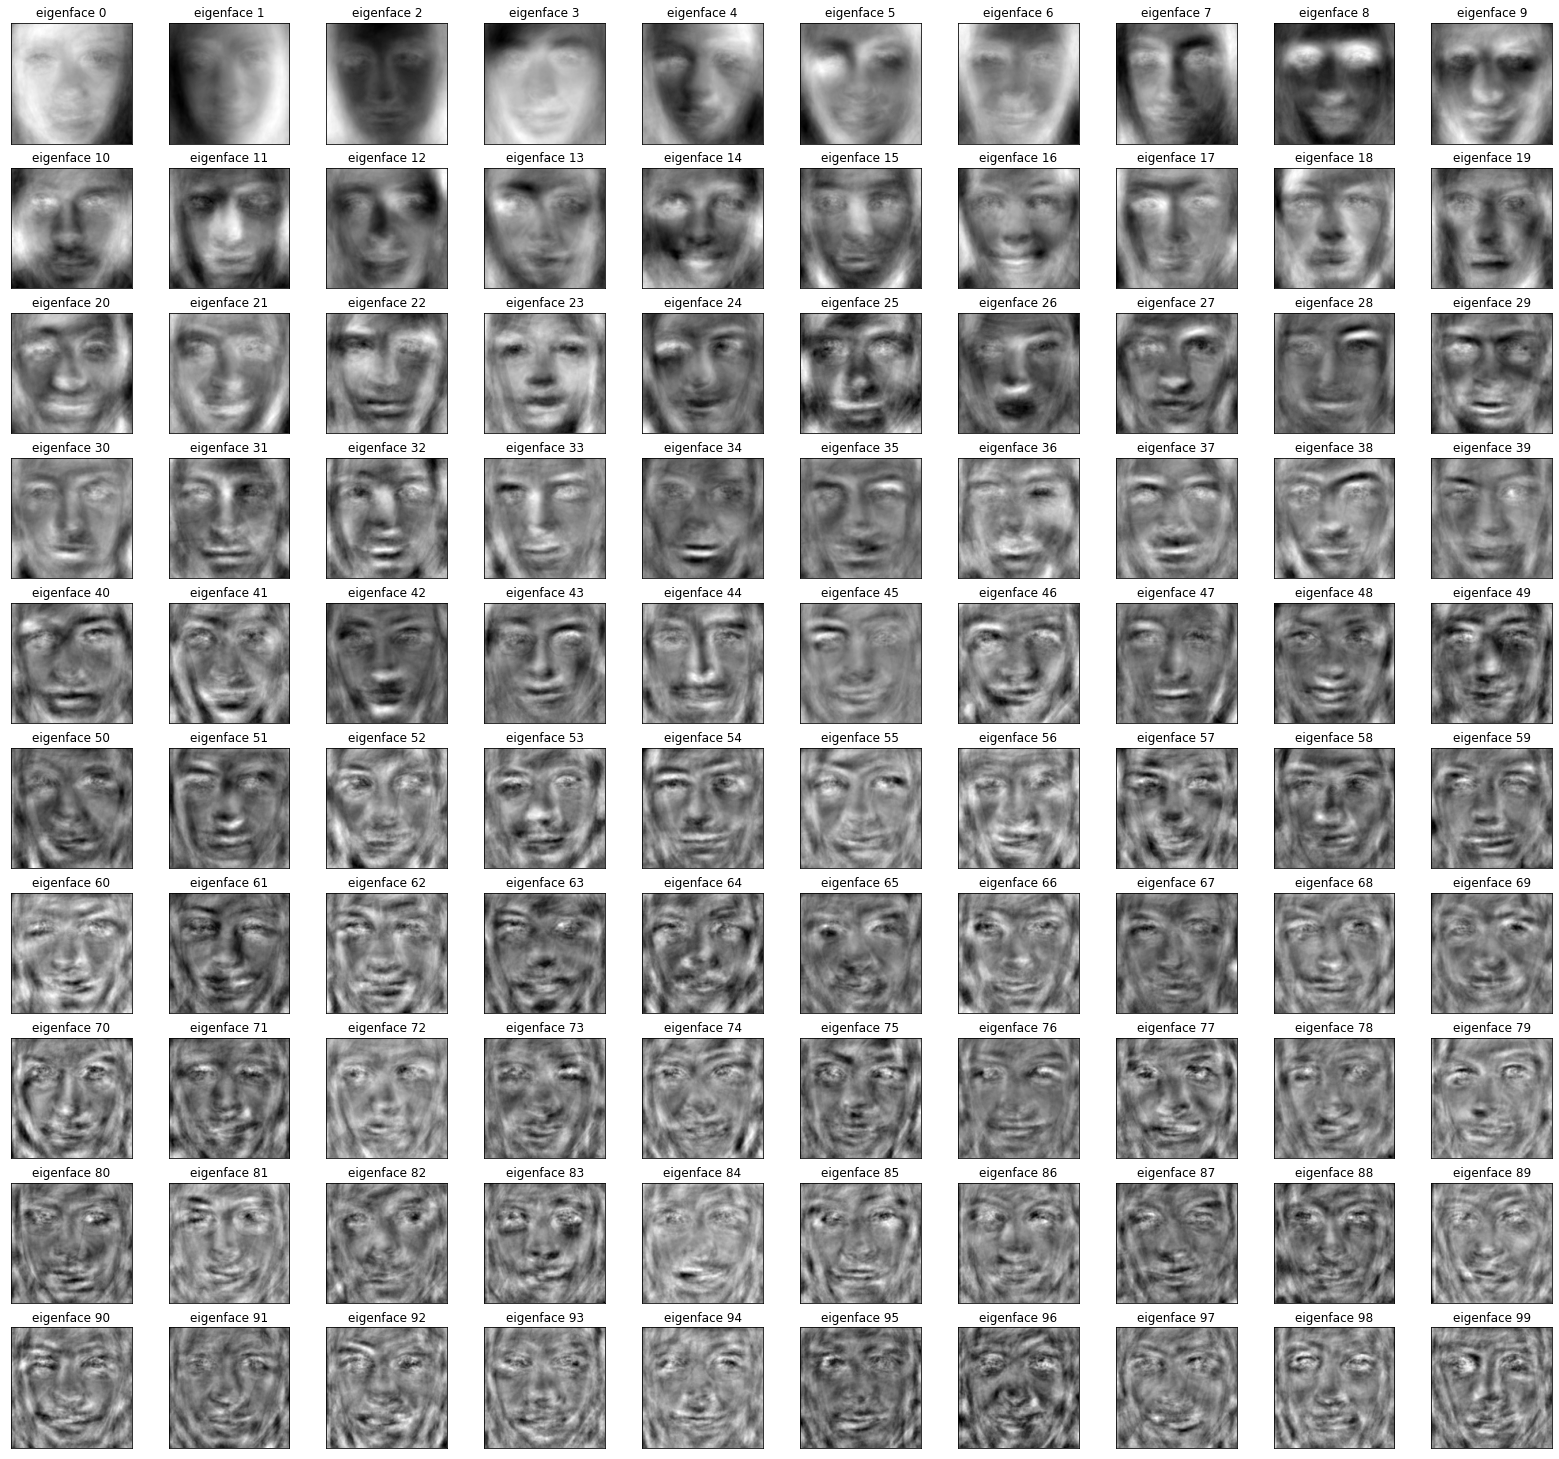

In [135]:
n_components = 2000
X = images.reshape(n_samples, h*w)
print("hfyydydydyd")
print(X)
print(X.shape)
P, C, M, Y= pca(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w,10,10) 

In [0]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
recover = np.asarray(recovered_images)
plot_portraits(recovered_images, labels, h, w, n_row=10, n_col=10)

In [0]:
from sklearn.metrics import mean_squared_error
s=0
for i in range(0,520):
  mean_sq =mean_squared_error(images[i], recover[i])
  s=s+mean_sq
  print("mean squared error is ",mean_sq)
print("total mean sq",s)